<a href="https://colab.research.google.com/github/sean-kearns/CourseWork/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import *
import glob
import os
import cv2

# Import new dataset


connect to google drive

In [ ]:
#mounting google drive to access my files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Sets the operating enviornment to the kaggle folder in the google drive

In [ ]:
#defining an environement for the kaggle folder
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

NameError: ignored

In [ ]:
#setting the working direcory to the kaggle folder
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
#downloading kaggle dataset
!kaggle datasets download -d moltean/fruits

 99% 750M/760M [00:21<00:00, 34.0MB/s]
100% 760M/760M [00:21<00:00, 36.7MB/s]


Unzipping the dataset, takes a long time

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg

# Create model 

load image processing packages

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-sizing all images
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/Kaggle/fruits-360/Training"
test_path = "/content/drive/MyDrive/Kaggle/fruits-360/Test"

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
#getting the output classes
folders = glob('/content/drive/MyDrive/Kaggle/fruits-360/Training/*')
folders

['/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Braeburn',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Crimson Snow',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Golden 1',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Golden 2',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Golden 3',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Granny Smith',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Pink Lady',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Red 1',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Red 2',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Red 3',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Red Delicious',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Red Yellow 1',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apple Red Yellow 2',
 '/content/drive/MyDrive/Kaggle/fruits-360/Training/Apricot',
 '/content/drive/MyDrive/Kag

flatten the model

In [ ]:
x = Flatten()(inception.output)

Option to delete the model so it can start fresh

In [ ]:
del(model)

Creates the model to be used later

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

Shows the layers within the model

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [ ]:
# cost and optimization functions for the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Define the training set and the test set 

In [ ]:
# defining trainiing set as same size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/fruits-360/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

KeyboardInterrupt: ignored

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/fruits-360/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# Run the model

In [ ]:
# fit the model, takes a long time, ran out of GPU usage
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
2116/2116 [==============================] - 1130s 532ms/step - loss: 4.4473 - accuracy: 0.7941 - val_loss: 3.8578 - val_accuracy: 0.8912
Epoch 2/10
2116/2116 [==============================] - 1065s 503ms/step - loss: 0.9309 - accuracy: 0.9640 - val_loss: 3.6309 - val_accuracy: 0.9215
Epoch 3/10
2116/2116 [==============================] - 1079s 510ms/step - loss: 0.7581 - accuracy: 0.9768 - val_loss: 4.7622 - val_accuracy: 0.9204
Epoch 4/10
2116/2116 [==============================] - 1109s 524ms/step - loss: 0.7436 - accuracy: 0.9811 - val_loss: 5.5017 - val_accuracy: 0.9230
Epoch 5/10
 712/2116 [=========>....................] - ETA: 10:56 - loss: 0.4551 - accuracy: 0.9884

Analyzing loss and accuracy functions

In [ ]:
import matplotlib.pyplot as plt

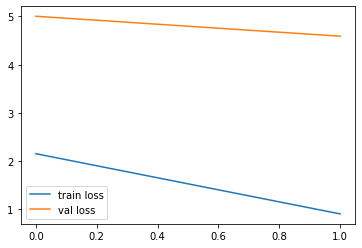

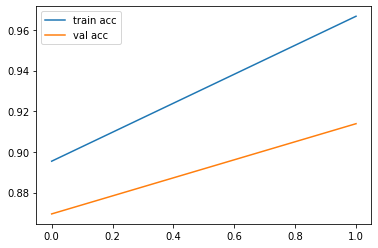

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Saving the model so training doesn't have to occur each run

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_inception.h5')


NameError: ignored

Loading the model so it doesn't have to be run each time.

In [ ]:
model = load_model('/content/drive/MyDrive/Kaggle/model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

NameError: ignored

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([  4,  52,  30, ..., 112,  80,  28])

# Testing our own images

Rerunning code from earlier becasue this data is lost each session close

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
model = load_model('/content/drive/MyDrive/Kaggle/model_inception.h5')

In [ ]:
folders = glob('/content/drive/MyDrive/Kaggle/fruits-360/Training/*')

Loading in our own images

In [ ]:
image_d = tf.keras.preprocessing.image.load_img('/content/banana.jpg', target_size=(224, 224))

image_array = tf.keras.preprocessing.image.img_to_array(image_d) / 255.0

image_array = image_array[tf.newaxis, ...]

output = model(image_array)

model_output = folders[np.argmax(output.numpy())]

In [ ]:
#because the index of folders[128] is a directory, finding the last object will be the item
food_guess = model_output.split('/')
food_guess

['',
 'content',
 'drive',
 'MyDrive',
 'Kaggle',
 'fruits-360',
 'Training',
 'Banana Red']

In [ ]:
#initializing a list for unknown foods
new_foods = []

# User Interface

In [ ]:
def user_int():
  user_response = input("You are trying to cut a {}, is this correct?".format(food_guess[7]))
  if user_response.upper() == "YES":
    print("Cutting Options [1: Slices, 2: Halves, 3: Diced]")
    cut_pref = input("Great, how would you like it cut?")
    print("Okay great, starting now")
    return cut_pref.upper()
  elif user_response.upper() == "NO":
    new_food = str(input("Ouch, what is the name of this food?"))
    new_foods.append(new_food)
    food_guess[7] = new_food
    user_int()
  else:
    print("I'm sorry, I don't understand. Can you answer with a yes or a no please?")
    user_int()

user_int()


You are trying to cut a Banana Red, is this correct?yes
Cutting Options [1: Slices, 2: Halves, 3: Diced]


Now contains a list of new foods, or a list of current foods that we need to examine

In [ ]:
new_foods

['ham']